In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

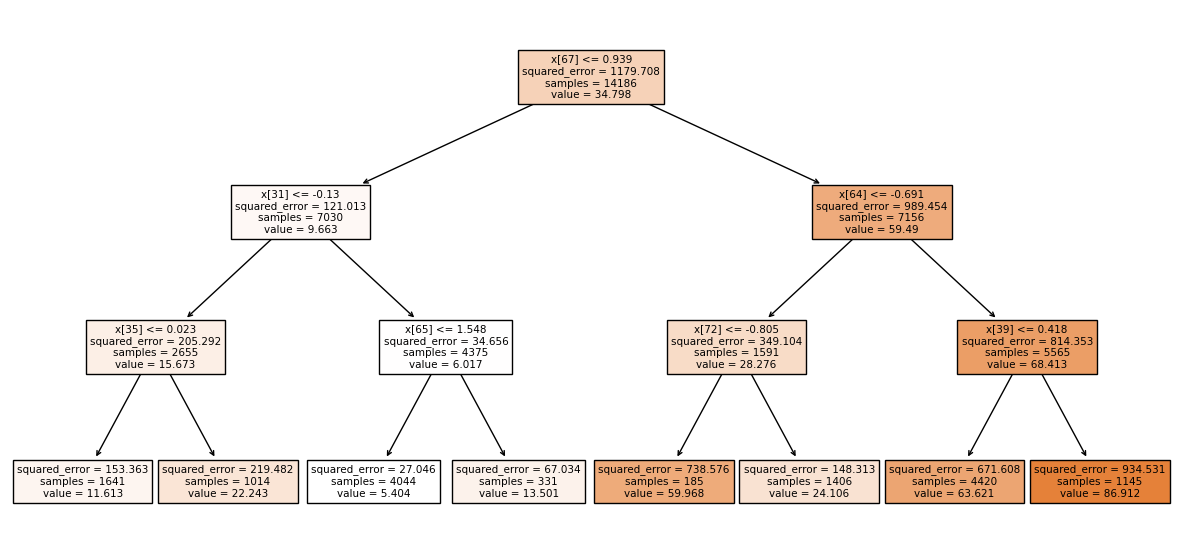

In [20]:
df = pd.read_csv("HA1-DatasetScaled.tsv", sep="\t")


X = df.drop(columns=['critical_temp'])  
y = df['critical_temp']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)


mdl = DecisionTreeRegressor(max_depth=3)
mdl.fit(X_train, y_train)


plt.figure(figsize=(15, 7))
plot_tree(mdl, filled=True)
plt.show()

The RVE is:  0.7110803154307113
The rmse is:  18.309750771622777
The Correlation Score is is: 0.8433 (p-value=0.000000e+00)

The Maximum Error is is:  86.86437327510933
The Mean Absolute Error is:  12.736092243568432


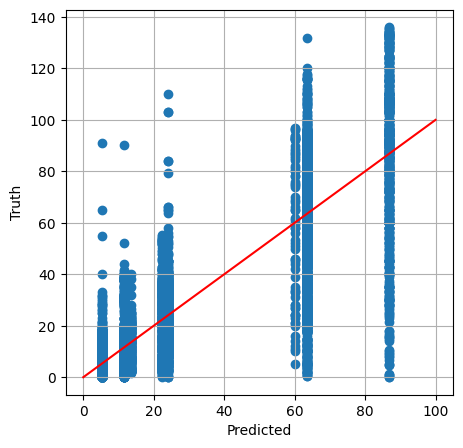

In [21]:
preds=mdl.predict(X_test)
explained_variance_score(y_test, preds)

print("The RVE is: ", explained_variance_score(y_test, preds))
print("The rmse is: ", mean_squared_error(y_test, preds, squared=False))
corr, pval=pearsonr(y_test, preds)
print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))

print("The Maximum Error is is: ", max_error(y_test, preds))
print("The Mean Absolute Error is: ", mean_absolute_error(y_test, preds))
reds=mdl.predict(X_test)
plt.figure(figsize=(5,5))
plt.scatter(preds, y_test)
plt.plot((0, 100), (0,100), c="r")
plt.grid()
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()



In [22]:
kf = KFold(n_splits=5, shuffle=True, random_state=22)

explained_variances = []
rmse_scores = []
correlations = []
max_errors = []
mae_scores = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    mdl = DecisionTreeRegressor(max_depth=3)
    mdl.fit(X_train, y_train)

    preds = mdl.predict(X_test)

    explained_variances.append(explained_variance_score(y_test, preds))
    rmse_scores.append(mean_squared_error(y_test, preds, squared=False))
    corr, _ = pearsonr(y_test, preds)
    correlations.append(corr)
    max_errors.append(max_error(y_test, preds))
    mae_scores.append(mean_absolute_error(y_test, preds))

print("Mean Explained Variance: ", sum(explained_variances) / len(explained_variances))
print("Mean RMSE: ", sum(rmse_scores) / len(rmse_scores))
print("Mean Correlation Score: ", sum(correlations) / len(correlations))
print("Mean Max Error: ", sum(max_errors) / len(max_errors))
print("Mean MAE: ", sum(mae_scores) / len(mae_scores))

Mean Explained Variance:  0.7021983580109994
Mean RMSE:  18.69131270993887
Mean Correlation Score:  0.8380431124634331
Mean Max Error:  108.07777300892226
Mean MAE:  13.042101141667635


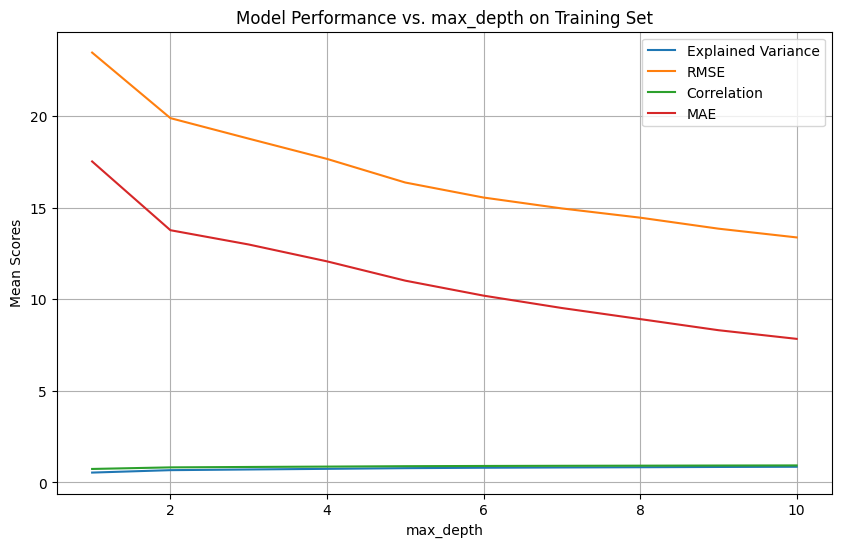

In [23]:
X_TR, X_IVS, y_TR, y_IVS = train_test_split(X, y, test_size=0.25, random_state=1337)

max_depth_values = range(1, 11)

mean_explained_variances = []
mean_rmse_scores = []
mean_correlations = []
mean_mae_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=1337)

for max_depth in max_depth_values:
    explained_variances = []
    rmse_scores = []
    correlations = []
    mae_scores = []

    for train_idx, test_idx in kf.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

        mdl = DecisionTreeRegressor(max_depth=max_depth)
        mdl.fit(X_train_fold, y_train_fold)
        preds = mdl.predict(X_test_fold)

        explained_variances.append(explained_variance_score(y_test_fold, preds))
        rmse_scores.append(mean_squared_error(y_test_fold, preds, squared=False))
        corr, _ = pearsonr(y_test_fold, preds)
        correlations.append(corr)
        mae_scores.append(mean_absolute_error(y_test_fold, preds))

    mean_explained_variances.append(np.mean(explained_variances))
    mean_rmse_scores.append(np.mean(rmse_scores))
    mean_correlations.append(np.mean(correlations))
    mean_mae_scores.append(np.mean(mae_scores))

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_explained_variances, label='Explained Variance')
plt.plot(max_depth_values, mean_rmse_scores, label='RMSE')
plt.plot(max_depth_values, mean_correlations, label='Correlation')
plt.plot(max_depth_values, mean_mae_scores, label='MAE')
plt.xlabel('max_depth')
plt.ylabel('Mean Scores')
plt.legend()
plt.title('Model Performance vs. max_depth on Training Set')
plt.grid(True)
plt.show()


In [24]:

kf = KFold(n_splits=5, shuffle=True)

explained_variances = []
rmse_scores = []
correlations = []
max_errors = []
mae_scores = []

for train_idx, test_idx in kf.split(X_TR):
    X_train, X_test = X_TR.iloc[train_idx], X_TR.iloc[test_idx]
    y_train, y_test = y_TR.iloc[train_idx], y_TR.iloc[test_idx]

    mdl = DecisionTreeRegressor(max_depth=10)
    mdl.fit(X_train, y_train)

    preds = mdl.predict(X_test)

    explained_variances.append(explained_variance_score(y_test, preds))
    rmse_scores.append(mean_squared_error(y_test, preds, squared=False))
    corr, _ = pearsonr(y_test, preds)
    correlations.append(corr)
    max_errors.append(max_error(y_test, preds))
    mae_scores.append(mean_absolute_error(y_test, preds))

print("Mean Explained Variance: ", sum(explained_variances) / len(explained_variances))
print("Mean RMSE: ", sum(rmse_scores) / len(rmse_scores))
print("Mean Correlation Score: ", sum(correlations) / len(correlations))
print("Mean Max Error: ", sum(max_errors) / len(max_errors))
print("Mean MAE: ", sum(mae_scores) / len(mae_scores))


Mean Explained Variance:  0.8558299353479354
Mean RMSE:  13.03921563329811
Mean Correlation Score:  0.9254940465145255
Mean Max Error:  122.02666666666669
Mean MAE:  7.767753442378256


In [25]:
mdl = DecisionTreeRegressor(max_depth=10)
mdl = mdl.fit(X_TR, y_TR)

preds_IVS = mdl.predict(X_IVS)

explained_variance_IVS = explained_variance_score(y_IVS, preds_IVS)
rmse_IVS = mean_squared_error(y_IVS, preds_IVS, squared=False)
corr_IVS, _ = pearsonr(y_IVS, preds_IVS)
max_error_IVS = max_error(y_IVS, preds_IVS)
mae_IVS = mean_absolute_error(y_IVS, preds_IVS)

print("Explained Variance on IVS: ", explained_variance_IVS)
print("RMSE on IVS: ", rmse_IVS)
print("Correlation Score on IVS: ", corr_IVS)
print("Max Error on IVS: ", max_error_IVS)
print("MAE on IVS: ", mae_IVS)

Explained Variance on IVS:  0.8571762086809558
RMSE on IVS:  12.792209088761357
Correlation Score on IVS:  0.9264834112663958
Max Error on IVS:  184.35
MAE on IVS:  7.43892200798911
